### Project 1

Project description: 
- Read data into Jupyter notebook, use pandas to import data into a data frame
- preprocess data: explore data, address missing data, categorical data, if there is any, and data scaling. Justify the type of scaling used in this project. 
- train your dataset using all the linear regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best repressor for this dataset and train your model on the entire dataset using the best parameters and predict the market price for the test_set.
- submit IPython notebook. Use markdown to provide an inline report for this project.

##### <font color = 'red'> Important note: All the group members should participate in completing this project.  This includes coding, preparing report and testing the models. 

# Importing Packages

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Loading Data

In [2]:
#Loading Dataset for Building the Model
data = pd.read_csv('bitcoin_dataset.csv')
#Loading the Testing Dataset for Prediction
test = pd.read_csv('test_set.csv')
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010 0:00,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010 0:00,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010 0:00,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010 0:00,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010 0:00,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


# Modifying Date Format and Drop Null Values

In [3]:
#Changing Date from String formaat to Data format
thelist=[(datetime.strptime(data['Date'][i][0:-5], '%m/%d/%Y')) for i in data.index]
df = pd.Series( (v for v in thelist) )
data["Date"]=df
#Dropping the Null Values
data=data.dropna()

# Variation of Bit Coin Price with Time

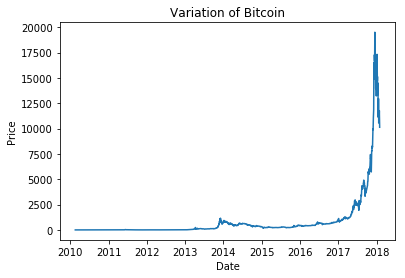

In [4]:
plt.plot(data['Date'],data['btc_market_price'])
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Variation of Bitcoin")
plt.show()

# Correlation between Variables

In [5]:
data.corr()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
btc_market_price,1.000000,0.390385,0.999786,0.869779,0.676715,0.544035,-0.077427,0.544690,0.275712,0.923315,...,-0.013540,0.816966,0.666254,0.570842,0.682193,0.559400,0.567658,0.110019,0.048918,0.969070
btc_total_bitcoins,0.390385,1.000000,0.382595,0.286133,0.777524,0.850936,0.278020,0.830744,0.666530,0.483286,...,-0.081161,0.371351,0.819057,0.832103,0.781682,0.813860,0.799113,0.289276,0.207422,0.387308
btc_market_cap,0.999786,0.382595,1.000000,0.870201,0.675158,0.541507,-0.081567,0.542447,0.272609,0.924588,...,-0.012942,0.807144,0.663216,0.568263,0.680394,0.556817,0.565327,0.110750,0.049474,0.969282
btc_trade_volume,0.869779,0.286133,0.870201,1.000000,0.527072,0.418645,-0.070331,0.433781,0.218220,0.764058,...,-0.009475,0.691620,0.544256,0.457498,0.531501,0.445550,0.453401,0.095981,0.054143,0.896081
btc_blocks_size,0.676715,0.777524,0.675158,0.527072,1.000000,0.956417,0.056526,0.946936,0.503175,0.823228,...,-0.030367,0.449656,0.967028,0.950547,0.999778,0.952453,0.961017,0.248305,0.149444,0.677311
btc_avg_block_size,0.544035,0.850936,0.541507,0.418645,0.956417,1.000000,0.148971,0.977196,0.549520,0.684328,...,-0.037274,0.336923,0.966606,0.977265,0.954604,0.975435,0.968294,0.292025,0.184697,0.554077
btc_n_orphaned_blocks,-0.077427,0.278020,-0.081567,-0.070331,0.056526,0.148971,1.000000,0.116194,0.065787,-0.091324,...,-0.016069,0.004397,0.123435,0.109478,0.056746,0.117675,0.075269,-0.007548,0.016561,-0.082181
btc_n_transactions_per_block,0.544690,0.830744,0.542447,0.433781,0.946936,0.977196,0.116194,1.000000,0.554911,0.667065,...,-0.036561,0.319823,0.965730,0.980265,0.945136,0.975778,0.974591,0.293431,0.181676,0.564988
btc_median_confirmation_time,0.275712,0.666530,0.272609,0.218220,0.503175,0.549520,0.065787,0.554911,1.000000,0.344450,...,-0.056847,0.180035,0.508800,0.540060,0.508689,0.505388,0.530541,0.306452,0.209027,0.281843
btc_hash_rate,0.923315,0.483286,0.924588,0.764058,0.823228,0.684328,-0.091324,0.667065,0.344450,1.000000,...,-0.015798,0.700391,0.767567,0.696451,0.826837,0.688954,0.707892,0.158165,0.079096,0.892695


# Removing the Independent Variables with High Correlation

In [6]:
#Important columns for Regression
column=['btc_total_bitcoins', 'btc_market_cap','btc_n_orphaned_blocks','btc_median_confirmation_time',
       'btc_cost_per_transaction','btc_output_volume', 'btc_estimated_transaction_volume']
# Filtered Data for Training the model
Xdata=data[column]
# Filtered Dataset for Testing the model
Tdata=test[column]
# Target Variable
Ydata=data['btc_market_price']

### Variation of Dependent Variable with the change in Independent Variables

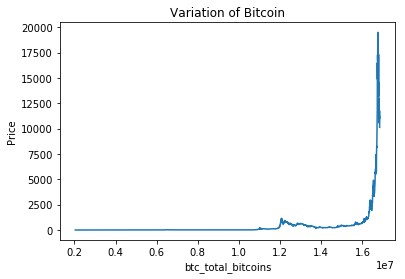

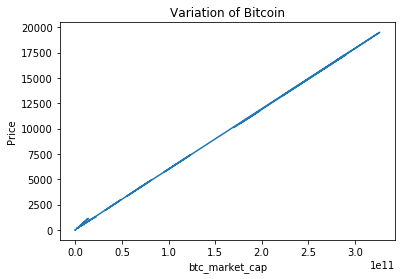

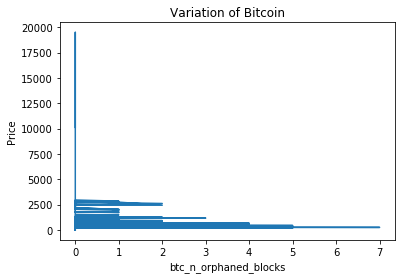

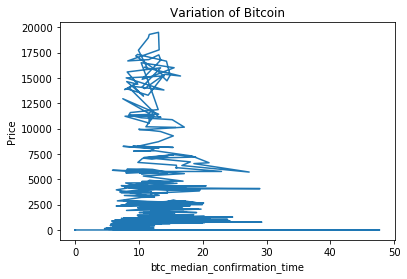

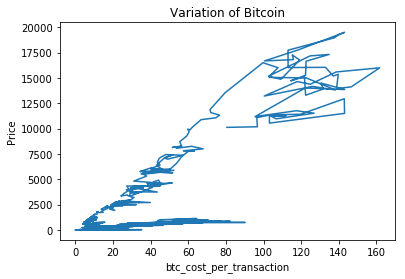

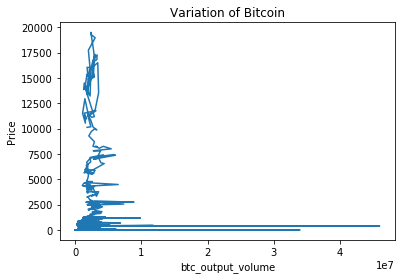

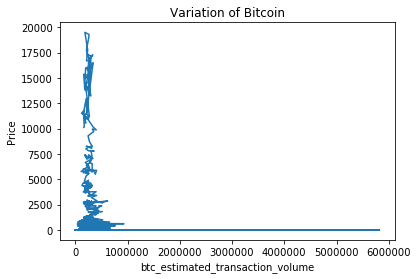

In [7]:
for i in column:
    plt.plot(data[i],data['btc_market_price'])
    plt.xlabel(i)
    plt.ylabel("Price")
    plt.title("Variation of Bitcoin")
    plt.show()

# Splitting Data for Training and Testing 75/25

In [8]:
x_train, x_test, y_train, y_test = train_test_split(Xdata,Ydata,random_state=111)
print("Shape of Training data\n", "Indepenedent Variables : ",x_train.shape,"Dependent Variables : ",y_train.shape)
print("Shape of Testing data\n", "Indepenedent Variables : ",x_test.shape," Dependent Variables : ",y_test.shape)

Shape of Training data
 Indepenedent Variables :  (2093, 7) Dependent Variables :  (2093,)
Shape of Testing data
 Indepenedent Variables :  (698, 7)  Dependent Variables :  (698,)


# Scaling Data

In [9]:
scaler=MinMaxScaler().fit(Xdata)
# Scaling the Data for Training the model
x_scaled=scaler.fit_transform(Xdata)
# Scaling the Testing Data to fit for prediction
t_scaled=scaler.transform(Tdata)
# Splitting the Scaled Data 
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(x_scaled,Ydata,random_state=111)
print("Shape of Training data\n", "Indepenedent Variables : ",x_train_scaled.shape,"Dependent Variables : ",y_train_scaled.shape)
print("Shape of Testing data\n", "Indepenedent Variables : ",x_test_scaled.shape," Dependent Variables : ",y_test_scaled.shape)

Shape of Training data
 Indepenedent Variables :  (2093, 7) Dependent Variables :  (2093,)
Shape of Testing data
 Indepenedent Variables :  (698, 7)  Dependent Variables :  (698,)


# KNN Regressor

KNN Regression on Unscaled Data

In [10]:
# Defining the KNN Regressor
knnreg=KNeighborsRegressor()
# Defining the number of neighbors for the model
k_value={'n_neighbors':range(1,100)}
# Defining the GridSearchCV for best accuracy using the different values of n
grid=GridSearchCV(knnreg,param_grid=k_value)
# Fitting the model
grid.fit(x_train,y_train)
print("The best training score is : ",'%.4f' %grid.score(x_train,y_train))
print("The best test score is : ",'%.4f' %grid.score(x_test,y_test))
# Printing the Best parmeters and Best estimator
print(grid.best_params_)
print(grid.best_estimator_)

The best training score is :  0.9999
The best test score is :  0.9997
{'n_neighbors': 2}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')


In [11]:
print("Mean Cross Validation Score of KNN on Unscaled Data :", 
      '%.4f' %cross_val_score(KNeighborsRegressor(n_neighbors=2), x_train, y_train, cv = 10).mean())

Mean Cross Validation Score of KNN on Unscaled Data : 0.9996


KNN Regression on Scaled Data

In [12]:
knnreg=KNeighborsRegressor()
# Defining the range of K values
k_value={'n_neighbors':range(1,100)}
gridscaled=GridSearchCV(knnreg,param_grid=k_value)
gridscaled.fit(x_train_scaled,y_train_scaled)
print("The training score is : ",'%.4f' %gridscaled.score(x_train_scaled,y_train_scaled))
print("The test score is : ",'%.4f' %gridscaled.score(x_test_scaled,y_test_scaled)," with ", gridscaled.best_params_)
# Printing the Best parmeters and Best estimator
print(gridscaled.best_params_)
print(gridscaled.best_estimator_)

The training score is :  0.9987
The test score is :  0.9968  with  {'n_neighbors': 3}
{'n_neighbors': 3}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')


In [13]:
print("Mean Cross Validation Score of KNN on Scaled Data :", 
      '%.4f' %cross_val_score(KNeighborsRegressor(n_neighbors=3), x_train_scaled, y_train_scaled, cv = 10).mean())

Mean Cross Validation Score of KNN on Scaled Data : 0.9969


# Linear Regression

Linear Regression on Unscaled Data

In [14]:
# Defining the Linear Regressor and Fitting the model on unscaled data
linreg=LinearRegression().fit(x_train,y_train)
print("The best training score is : ",'%.4f' %linreg.score(x_train,y_train))
print("The best test score is : ",'%.4f' %linreg.score(x_test,y_test))

The best training score is :  0.9999
The best test score is :  0.9999


In [15]:
print("Mean Cross Validation Score of Linear Regression on Unscaled Data :", 
      '%.4f' %cross_val_score(LinearRegression(), x_train, y_train, cv = 10).mean())

Mean Cross Validation Score of Linear Regression on Unscaled Data : 0.9999


Linear Regression on Scaled Data

In [16]:
# Defining the Linear Regressor and Fitting the model on scaled data
linregscaled=LinearRegression().fit(x_train_scaled,y_train_scaled)
print("The best training score is : ",'%.4f' %linregscaled.score(x_train_scaled,y_train_scaled))
print("The best test score is : ",'%.4f' %linregscaled.score(x_test_scaled,y_test_scaled))

The best training score is :  0.9999
The best test score is :  0.9999


In [17]:
print("Mean Cross Validation Score of Linear Regression on Scaled Data :", 
      '%.4f' %cross_val_score(LinearRegression(), x_train_scaled, y_train_scaled, cv = 10).mean())

Mean Cross Validation Score of Linear Regression on Scaled Data : 0.9999


# Ridge Regression

Ridge Regression on Unscaled Data

In [18]:
# Defining the Ridge Regressor
linridge=Ridge()
alpha={'alpha':[0.1,1,5,10,15,20,25]}
gridridge=GridSearchCV(linridge,param_grid=alpha)
# Fitting the model on Unscaled data
gridridge.fit(x_train,y_train)
print("The training score is : ",'%.4f' %gridridge.score(x_train,y_train))
print("The test score is : ",'%.4f' %gridridge.score(x_test,y_test)," with ", gridridge.best_params_)
# Printing the Best parmeters and Best estimator
print(gridridge.best_params_)
print(gridridge.best_estimator_)

The training score is :  0.9999
The test score is :  0.9999  with  {'alpha': 25}
{'alpha': 25}
Ridge(alpha=25, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [19]:
print("Mean Cross Validation Score of Ridge Regression on Unscaled Data :", 
      '%.4f' %cross_val_score(Ridge(alpha=25), x_train, y_train, cv = 10).mean())

Mean Cross Validation Score of Ridge Regression on Unscaled Data : 0.9999


In [20]:
# Defining the RidgeCv
linridge=RidgeCV()
# Fitting the model 
linridge.fit(x_train,y_train)
print("The training score is : ",'%.4f' %linridge.score(x_train,y_train))
print("The test score is : ",'%.4f' %linridge.score(x_test,y_test))
# Intercepts and Coefficients in the regression
print(linridge.intercept_,linridge.coef_)
print("Number of non zero Coef : ",np.sum(linridge.coef_ != 0))
print("Number of Important Coef : ",np.sum(abs(linridge.coef_) > 1))

The training score is :  -352911110978690.0000
The test score is :  -354105343346250.3125
15865639761.3 [  3.96072865e-04  -1.11962891e+00  -3.12040134e-01   1.85698696e-01
   3.07146442e+00   5.94258308e-05   1.95391476e-06]
Number of non zero Coef :  7
Number of Important Coef :  2


Ridge Regression on Scaled Data

In [21]:
linridgescaled=Ridge()
alpha={'alpha':[0.1,1,5,10,15,20,25]}
gridridgescaled=GridSearchCV(linridgescaled,param_grid=alpha)
# Fitting the model
gridridgescaled.fit(x_train_scaled,y_train_scaled)
print("The training score is : ",'%.4f' %gridridgescaled.score(x_train_scaled,y_train_scaled))
print("The test score is : ",'%.4f' %gridridgescaled.score(x_test_scaled,y_test_scaled)," with ", gridridgescaled.best_params_)
# Printing the Best parmeters and Best estimator
print(gridridgescaled.best_params_)
print(gridridgescaled.best_estimator_)

The training score is :  0.9999
The test score is :  0.9999  with  {'alpha': 0.1}
{'alpha': 0.1}
Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [22]:
print("Mean Cross Validation Score of Ridge Regression on Scaled Data :", 
      '%.4f' %cross_val_score(Ridge(alpha=0.1), x_train_scaled, y_train_scaled, cv = 10).mean())

Mean Cross Validation Score of Ridge Regression on Scaled Data : 0.9999


In [23]:
linridgescaled=RidgeCV()
# Fittinf the model on Scaled data
linridgescaled.fit(x_train_scaled,y_train_scaled)
print("The training score is : ",'%.4f' %linridgescaled.score(x_train_scaled,y_train_scaled))
print("The test score is : ",'%.4f' %linridgescaled.score(x_test_scaled,y_test_scaled))
# Number of non zero Coefficients
print("Number of non zero Coef : ",np.sum(linridgescaled.coef_ != 0))
# Number of important Coefficients
print("Number of Important Coef : ",np.sum(abs(linridgescaled.coef_) > 1))

The training score is :  0.9999
The test score is :  0.9999
Number of non zero Coef :  7
Number of Important Coef :  6


# Lasso Regression

Lasso Regression on Unscaled Data

In [24]:
# Defining the Lasso Model
linlasso=Lasso()
param={'alpha':[0.1,1,5,10,15,20,25], 'max_iter':[10,100,1000,10000]}
gridlasso=GridSearchCV(linlasso,param_grid=param)
# Fitting the Model on Unscaled Data
gridlasso.fit(x_train,y_train)
print("The training score is : ",'%.4f' %gridlasso.score(x_train,y_train))
print("The test score is : ",'%.4f' %gridlasso.score(x_test,y_test)," with ", gridlasso.best_params_)
# Printing the Best parmeters and Best estimator
print(gridlasso.best_params_)
print(gridlasso.best_estimator_)

The training score is :  0.9999
The test score is :  0.9999  with  {'alpha': 0.1, 'max_iter': 100}
{'alpha': 0.1, 'max_iter': 100}
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


In [25]:
print("Mean Cross Validation Score of Lasso Regression on Unscaled Data :", 
      '%.4f' %cross_val_score(Lasso(alpha=0.1, max_iter=100), x_train, y_train, cv = 10).mean())

Mean Cross Validation Score of Lasso Regression on Unscaled Data : 0.9999


In [26]:
# Defining the Lasso Model with build in Cross Validation
linlasso=LassoCV()
# Training the model
linlasso.fit(x_train,y_train)
print("The training score is : ",'%.4f' %linlasso.score(x_train,y_train))
print("The test score is : ",'%.4f' %linlasso.score(x_test,y_test))
print("Number of Important Coef : ",np.sum(linlasso.coef_ != 0))

The training score is :  0.9996
The test score is :  0.9995
Number of Important Coef :  1


Lasso Regression on Scaled Data

In [27]:
linlassoscaled=Lasso()
param={'alpha':[0.1,1,5,10,15,20,25], 'max_iter':[10,100,1000,10000]}
gridlassoscaled=GridSearchCV(linlassoscaled,param_grid=param)
# Training the model on Scaled Data
gridlassoscaled.fit(x_train_scaled,y_train_scaled)
print("The training score is : ",'%.4f' %gridlassoscaled.score(x_train_scaled,y_train_scaled))
print("The test score is : ",'%.4f' %gridlassoscaled.score(x_test_scaled,y_test_scaled)," with ", gridlassoscaled.best_params_)
# Printing the Best parmeters and Best estimator
print(gridlassoscaled.best_params_)
print(gridlassoscaled.best_estimator_)

C:\Users\satya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\satya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\satya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\satya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increa

The training score is :  0.9999
The test score is :  0.9999  with  {'alpha': 0.1, 'max_iter': 100}
{'alpha': 0.1, 'max_iter': 100}
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


In [28]:
print("Mean Cross Validation Score of Lasso Regression on Scaled Data :", 
      '%.4f' %cross_val_score(Lasso(alpha=0.1, max_iter=100), x_train_scaled, y_train_scaled, cv = 10).mean())

Mean Cross Validation Score of Lasso Regression on Scaled Data : 0.9999


In [29]:
linlassoscaled=LassoCV()
# Fitting the model
linlassoscaled.fit(x_train_scaled,y_train_scaled)
print("The training score is : ",'%.4f' %linlassoscaled.score(x_train_scaled,y_train_scaled))
print("The test score is : ",'%.4f' %linlassoscaled.score(x_test_scaled,y_test_scaled))
print("Number of non zero Coef : ",np.sum(linlassoscaled.coef_ != 0))
print("Number of Important Coef : ",np.sum(abs(linlassoscaled.coef_) > 1))

The training score is :  0.9999
The test score is :  0.9999
Number of non zero Coef :  3
Number of Important Coef :  3


# Polynomial Regression

Polynomial Regression on Unscaled Data

In [30]:
# Defining a Polynomial Model with degree=2
poly=PolynomialFeatures(degree=2)
# Fitting the training Data with polynimial Features
x_poly=poly.fit_transform(Xdata)
x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(x_poly,Ydata)
linregpoly=LinearRegression().fit(x_train_poly,y_train_poly)
print("The training score is : ",'%.4f' %linregpoly.score(x_train_poly,y_train_poly))
print("The test score is : ",'%.4f' %linregpoly.score(x_test_poly,y_test_poly))

The training score is :  1.0000
The test score is :  1.0000


In [31]:
print("Mean Cross Validation Score of Polynomial Regression on Unscaled Data :", 
      '%.4f' %cross_val_score(LinearRegression(), x_train_poly, y_train_poly, cv = 10).mean())

Mean Cross Validation Score of Polynomial Regression on Unscaled Data : 1.0000


Polynomial Regression on Scaled Data

In [32]:
poly=PolynomialFeatures(degree=2)
# Fitting the polynomial Features on Scaled Data
x_poly_scaled=poly.fit_transform(x_scaled)
t_poly_scaled=poly.transform(t_scaled)
x_train_poly_scaled, x_test_poly_scaled, y_train_poly_scaled, y_test_poly_scaled = train_test_split(x_poly_scaled,Ydata)
# Training the polynomial Regression using Linear Regression
linregpolyscaled=LinearRegression().fit(x_train_poly_scaled,y_train_poly_scaled)
print("The training score is : ",'%.4f' %linregpolyscaled.score(x_train_poly_scaled,y_train_poly_scaled))
print("The test score is : ",'%.4f' %linregpolyscaled.score(x_test_poly_scaled,y_test_poly_scaled))

The training score is :  1.0000
The test score is :  1.0000


In [33]:
print("Mean Cross Validation Score of Polynomial Regression on Scaled Data :", 
      '%.4f' %cross_val_score(LinearRegression(), x_train_poly_scaled, y_train_poly_scaled, cv = 10).mean())

Mean Cross Validation Score of Polynomial Regression on Scaled Data : 1.0000


# SVM

### SVM with out Kernel

In [34]:
# Defining the Support Vector Regressor With out any Kernel and training the model
SVreg=SVR().fit(x_train_scaled,y_train_scaled)
print("The best training score is : ",'%.4f' %SVreg.score(x_train_scaled,y_train_scaled))
print("The best test score is : ",'%.4f' %SVreg.score(x_test_scaled,y_test_scaled))

The best training score is :  -0.0597
The best test score is :  -0.0480


In [35]:
print("Mean Cross Validation Score of SVR on Scaled Data :", 
      '%.4f' %cross_val_score(SVR(), x_train_scaled, y_train_scaled, cv = 10).mean())

Mean Cross Validation Score of SVR on Scaled Data : -0.0620


### SVM with Kernel

In [36]:
param={'epsilon':[0.1,0.5,1,2,5,10,15,20,25,100], 'C':[1,5,10,20,50,100,1000,10000]}
# Defining the Support vector Regressor with Linear Kernel
clf=SVR(kernel='linear')
gridsvr=GridSearchCV(clf,param)
# Training the model
gridsvr.fit(x_train_scaled,y_train_scaled)
print("The training score is : ",'%.4f' %gridsvr.score(x_train_scaled,y_train_scaled))
print("The test score is : ",'%.4f' %gridsvr.score(x_test_scaled,y_test_scaled))
# Printing the Best parmeters and Best estimator
print(gridsvr.best_params_)
print(gridsvr.best_estimator_)

The training score is :  0.9999
The test score is :  0.9999
{'C': 10000, 'epsilon': 20}
SVR(C=10000, cache_size=200, coef0=0.0, degree=3, epsilon=20, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [37]:
print("Mean Cross Validation Score of Linear SVR on Scaled Data :", 
      '%.4f' %cross_val_score(SVR(kernel='linear', epsilon=20, C=10000), x_train_scaled, y_train_scaled, cv = 10).mean())

Mean Cross Validation Score of Linear SVR on Scaled Data : 0.9999


In [38]:
param={'epsilon':[0.1,0.5,1,2,5,10,50,100,500], 'C':[1,5,10,20,50,100,1000]}
# Defining the Support vector Regressor with RBF Kernel
clfrbf=SVR(kernel='rbf')
gridsvrrbf=GridSearchCV(clfrbf,param)
# Training the model
gridsvrrbf.fit(x_train_scaled,y_train_scaled)
print("The training score is : ",'%.4f' %gridsvrrbf.score(x_train_scaled,y_train_scaled))
print("The test score is : ",'%.4f' %gridsvrrbf.score(x_test_scaled,y_test_scaled))
# Printing the Best parmeters and Best estimator
print(gridsvrrbf.best_params_)
print(gridsvrrbf.best_estimator_)

The training score is :  0.9908
The test score is :  0.9912
{'C': 1000, 'epsilon': 100}
SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=100, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [39]:
print("Mean Cross Validation Score of RBF SVR on Scaled Data :", 
      '%.4f' %cross_val_score(SVR(kernel='rbf', epsilon=100, C=1000), x_train_scaled, y_train_scaled, cv = 10).mean())

Mean Cross Validation Score of RBF SVR on Scaled Data : 0.9847


In [40]:
param={'epsilon':[0.1,1,10,100,400,500], 'C':[1,5,10,20,50,100,1000,10000]}
# Defining the Support vector Regressor with Polynomial Kernel
clfpoly=SVR(kernel='poly')
gridsvrpoly=GridSearchCV(clfpoly,param)
# Training the model
gridsvrpoly.fit(x_train_scaled,y_train_scaled)
print("The training score is : ",'%.4f' %gridsvrpoly.score(x_train_scaled,y_train_scaled))
print("The test score is : ",'%.4f' %gridsvrpoly.score(x_test_scaled,y_test_scaled))
# Printing the Best parmeters and Best estimator
print(gridsvrpoly.best_params_)
print(gridsvrpoly.best_estimator_)

The training score is :  0.9569
The test score is :  0.9577
{'C': 10000, 'epsilon': 400}
SVR(C=10000, cache_size=200, coef0=0.0, degree=3, epsilon=400, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [41]:
print("Mean Cross Validation Score of Polynomial SVR on Scaled Data :", 
      '%.4f' %cross_val_score(SVR(kernel='poly', epsilon=400, C=10000), x_train_scaled, y_train_scaled, cv = 10).mean())

Mean Cross Validation Score of Polynomial SVR on Scaled Data : 0.9513


# Cross Validation Scores

In [42]:
print("Mean Cross Validation Score of KNN on Unscaled Data :", 
      '%.4f' %cross_val_score(KNeighborsRegressor(n_neighbors=2), x_train, y_train, cv = 10).mean())
print("Mean Cross Validation Score of KNN on Scaled Data :", 
      '%.4f' %cross_val_score(KNeighborsRegressor(n_neighbors=3), x_train_scaled, y_train_scaled, cv = 10).mean())
print("Mean Cross Validation Score of Linear Regression on Unscaled Data :", 
      '%.4f' %cross_val_score(LinearRegression(), x_train, y_train, cv = 10).mean())
print("Mean Cross Validation Score of Linear Regression on Scaled Data :", 
      '%.4f' %cross_val_score(LinearRegression(), x_train_scaled, y_train_scaled, cv = 10).mean())
print("Mean Cross Validation Score of Ridge Regression on Unscaled Data :", 
      '%.4f' %cross_val_score(Ridge(alpha=25), x_train, y_train, cv = 10).mean())
print("Mean Cross Validation Score of Ridge Regression on Scaled Data :", 
      '%.4f' %cross_val_score(Ridge(alpha=0.1), x_train_scaled, y_train_scaled, cv = 10).mean())
print("Mean Cross Validation Score of Lasso Regression on Unscaled Data :", 
      '%.4f' %cross_val_score(Lasso(alpha=0.1, max_iter=100), x_train, y_train, cv = 10).mean())
print("Mean Cross Validation Score of Lasso Regression on Scaled Data :", 
      '%.4f' %cross_val_score(Lasso(alpha=0.1, max_iter=100), x_train_scaled, y_train_scaled, cv = 10).mean())
print("Mean Cross Validation Score of Polynomial Regression on Unscaled Data :", 
      '%.4f' %cross_val_score(LinearRegression(), x_train_poly, y_train_poly, cv = 10).mean())
print("Mean Cross Validation Score of Polynomial Regression on Scaled Data :", 
      '%.4f' %cross_val_score(LinearRegression(), x_train_poly_scaled, y_train_poly_scaled, cv = 10).mean())
print("Mean Cross Validation Score of SVR on Scaled Data :", 
      '%.4f' %cross_val_score(SVR(), x_train_scaled, y_train_scaled, cv = 10).mean())
print("Mean Cross Validation Score of Linear SVR on Scaled Data :", 
      '%.4f' %cross_val_score(SVR(kernel='linear', epsilon=20, C=10000), x_train_scaled, y_train_scaled, cv = 10).mean())
print("Mean Cross Validation Score of RBF SVR on Scaled Data :", 
      '%.4f' %cross_val_score(SVR(kernel='rbf', epsilon=100, C=1000), x_train_scaled, y_train_scaled, cv = 10).mean())
print("Mean Cross Validation Score of Polynomial SVR on Scaled Data :", 
      '%.4f' %cross_val_score(SVR(kernel='poly', epsilon=400, C=10000), x_train_scaled, y_train_scaled, cv = 10).mean())

Mean Cross Validation Score of KNN on Unscaled Data : 0.9996
Mean Cross Validation Score of KNN on Scaled Data : 0.9969
Mean Cross Validation Score of Linear Regression on Unscaled Data : 0.9999
Mean Cross Validation Score of Linear Regression on Scaled Data : 0.9999
Mean Cross Validation Score of Ridge Regression on Unscaled Data : 0.9999
Mean Cross Validation Score of Ridge Regression on Scaled Data : 0.9999
Mean Cross Validation Score of Lasso Regression on Unscaled Data : 0.9999
Mean Cross Validation Score of Lasso Regression on Scaled Data : 0.9999
Mean Cross Validation Score of Polynomial Regression on Unscaled Data : 1.0000
Mean Cross Validation Score of Polynomial Regression on Scaled Data : 1.0000
Mean Cross Validation Score of SVR on Scaled Data : -0.0620
Mean Cross Validation Score of Linear SVR on Scaled Data : 0.9999
Mean Cross Validation Score of RBF SVR on Scaled Data : 0.9847
Mean Cross Validation Score of Polynomial SVR on Scaled Data : 0.9513


# Predicting Testing Data with Top 5 Models

### 1. Linear Polynomial Regression

In [43]:
# Predicting the Test Data with a Model with Maximum Accuracy
linregpolyscaled.predict(t_poly_scaled)

array([ 9067.68753336,  8889.1500209 ,  9066.12601279,  8395.17037503,
        6827.22160366,  7669.29513825,  8083.10846507,  8227.68432795,
        8522.02862241,  8306.97502614,  8335.34404471,  8801.33416625,
        8587.6877392 ,  9324.86796805])

### 2. Lasso Regression

In [44]:
linlassoscaled.predict(t_scaled)

array([ 9156.6779816 ,  9015.23384025,  9215.12026987,  8597.56679524,
        6966.21530725,  7776.3078007 ,  8180.91795777,  8351.27344688,
        8650.48652268,  8442.17511812,  8540.49792267,  8971.44775622,
        8758.58185349,  9511.28378694])

### 3. Ridge Regression

In [45]:
linridgescaled.predict(t_scaled)

array([ 9143.85551792,  9012.76413161,  9218.30717638,  8617.88056186,
        6969.45326734,  7767.4991112 ,  8168.58505592,  8349.37470364,
        8647.86666755,  8440.52162408,  8558.278156  ,  8978.8774645 ,
        8766.8806404 ,  9521.11597568])

### 4. Linear Regression

In [46]:
linregscaled.predict(t_scaled)

array([ 9164.86170644,  9023.74944541,  9224.59231552,  8607.12987   ,
        6972.23081887,  7782.57448128,  8187.99804782,  8359.85620582,
        8659.15372584,  8450.353949  ,  8549.72714629,  8980.6322747 ,
        8767.90000656,  9521.28009151])

### 5. KNN

In [47]:
knn=KNeighborsRegressor(n_neighbors=2)
knn=knn.fit(x_train,y_train)
knn.predict(Tdata)

array([ 9212.8511585,  8487.7211335,  9212.8511585,  8261.8159085,
        7028.5458835,  7800.9575335,  8253.287575 ,  8261.8159085,
        8487.7211335,  8261.8159085,  8261.8159085,  8487.7211335,
        8487.7211335,  9798.8116915])

### 6. Linear SVR

In [48]:
linsvr=SVR(kernel='linear', epsilon=20, C=10000)
linsvr=linsvr.fit(x_train_scaled,y_train_scaled)
linsvr.predict(t_scaled)

array([ 9180.51620276,  9039.49005961,  9239.96100875,  8622.26641702,
        6984.80101534,  7796.05790029,  8201.5625064 ,  8374.44793699,
        8673.92321275,  8464.40453698,  8564.23378297,  8996.0286708 ,
        8782.90970399,  9537.3204689 ])